# Clustering electricity profiles project

Project aims to find patterns in energy consumption of a single household
Dataset used in the project can be found under the URL
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

The data was cleaned and organised

In [1]:
%matplotlib inline

import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('seaborn')

df = pd.read_csv('data/household_power_consumption.txt', sep=';', usecols=['Date', 'Time', 'Global_active_power'])

df['datetime'] = pd.to_datetime(df['Date'] + ' '+ df['Time'])
df = df.drop(['Date','Time'], axis=1)
df = df.set_index('datetime')

df = df.replace('?', np.nan)
df = df.astype(np.float).fillna(method='bfill')

df.head()

C:\Anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


Some initial overview was made

In [2]:
df.describe()

,Global_active_power
count,2.075259e+06
mean,1.094391e+00
std,1.054990e+00
min,7.600000e-02
25%,3.100000e-01
50%,6.200000e-01
75%,1.536000e+00
max,1.112200e+01


In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,2
Number of observations,2075259
Total Missing (%),0.0%
Total size in memory,31.7 MiB
Average record size in memory,16.0 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [5]:
df_hourly = df.resample('H').sum()

In [7]:
df_hourly['hour'] = df_hourly.index.hour

In [8]:
df_hourly.head()

,Global_active_power,hour
datetime,,
2006-12-16 17:00:00,152.024,17
2006-12-16 18:00:00,217.932,18
2006-12-16 19:00:00,204.014,19
2006-12-16 20:00:00,196.114,20
2006-12-16 21:00:00,183.388,21


In [9]:
df_hourly.index = df_hourly.index.date

In [10]:
df_hourly.head()

,Global_active_power,hour
2006-12-16,152.024,17
2006-12-16,217.932,18
2006-12-16,204.014,19
2006-12-16,196.114,20
2006-12-16,183.388,21


In [13]:
df_hourly_to_be_saved = df_hourly.copy()
df_hourly_to_be_saved['date'] = df_hourly_to_be_saved.index
df_hourly_to_be_saved.to_csv('power_hour_date.csv', index=False)

# Preprocessed data ready to be read

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

df_hourly = pd.read_csv('power_hour_date.csv')
df_hourly.index = df_hourly['date']
df_hourly = df_hourly.drop(['date'], axis=1)
df_hourly.head()

,Global_active_power,hour
date,,
2006-12-16,152.024,17
2006-12-16,217.932,18
2006-12-16,204.014,19
2006-12-16,196.114,20
2006-12-16,183.388,21


The data was transformed to represent energy usage in every hour

In [2]:
df_hourly_pivot = df_hourly.pivot(columns='hour')
df_hourly_pivot = df_hourly_pivot.dropna()
df_hourly_pivot.head()

Global_active_power                                             \
hour                        0        1       2       3        4        5    
date                                                                        
2006-12-17             112.948  200.964  95.236  99.732  132.946  119.804   
2006-12-18              16.582   18.798  17.068  18.596   61.580   17.610   
2006-12-19              50.228   21.182  19.634  18.498   19.670   18.400   
2006-12-20              27.590   15.520  47.062  18.602   17.340   15.762   
2006-12-21              92.152   83.878  76.494  18.156   14.804   17.442   

                                               ...                             \
hour            6        7        8        9   ...       14       15       16   
date                                           ...                              
2006-12-17  78.198   97.202  113.434  152.944  ...  125.558  179.124  199.562   
2006-12-18  36.600  147.026  124.928   97.760  ...  103.982  107.058  116.958   
2006-12-19  47.780  107.138  232.742   97.066  ...   18.128   25.282   82.328   
2006-12-20  17.016   91.598  175.056   83.132  ...   77.694   16.868   28.106   
2006-12-21  17.740   76.828   93.782  154.548  ...   61.434   18.444   81.604   

                                                                           
hour             17       18       19       20       21       22       23  
date                                                                       
2006-12-17  204.406  221.826  174.504  201.690  182.446   91.080   26.264  
2006-12-18  129.294  144.152  156.870  183.034  130.184  104.328   92.836  
2006-12-19  126.690  132.282  110.526  176.432   86.572   43.200   23.022  
2006-12-20   34.410  170.210  194.918  214.528  218.764  183.538  142.906  
2006-12-21  105.158  146.598  131.828  146.242   58.936   16.816   16.226  

[5 rows x 24 columns]

In [5]:
df_hourly_pivot.T.head()

date                      2006-12-17  2006-12-18  2006-12-19  2006-12-20  \
                    hour                                                   
Global_active_power 0        112.948      16.582      50.228      27.590   
                    1        200.964      18.798      21.182      15.520   
                    2         95.236      17.068      19.634      47.062   
                    3         99.732      18.596      18.498      18.602   
                    4        132.946      61.580      19.670      17.340   

date                      2006-12-21  2006-12-22  2006-12-23  2006-12-24  \
                    hour                                                   
Global_active_power 0         92.152      16.016     101.894     241.680   
                    1         83.878      16.320     103.368     196.542   
                    2         76.494      16.058     102.046     138.182   
                    3         18.156      16.432     106.292      96.406   
                    4         14.804      15.856     113.496      94.566   

date                      2006-12-25  2006-12-26  ...  2010-12-02  2010-12-03  \
                    hour                          ...                           
Global_active_power 0         59.974     145.456  ...      19.296      83.868   
                    1         72.406     144.158  ...      18.246      21.354   
                    2         26.280     144.656  ...      59.190      18.116   
                    3         35.398     146.944  ...      19.202      17.896   
                    4         34.720     179.550  ...      22.474      18.430   

date                      2010-12-04  2010-12-05  2010-12-06  2010-12-07  \
                    hour                                                   
Global_active_power 0         23.380      19.584      58.472      66.032   
                    1         21.698      59.170      25.414      23.094   
                    2         22.486      30.088      48.152      28.124   
                    3         46.488      21.054      19.114      20.464   
                    4         23.182      18.894      20.546      21.752   

date                      2010-12-08  2010-12-09  2010-12-10  2010-12-11  
                    hour                                                  
Global_active_power 0         37.004     114.978      23.672      52.860  
                    1         56.490     105.758      23.858      16.036  
                    2         16.658     136.446      28.118      21.038  
                    3         16.208     134.158      20.248      19.224  
                    4         18.534      85.730      20.030      16.752  

[5 rows x 1456 columns]

# Chart shows energy usages every day. Some patterns can be observed

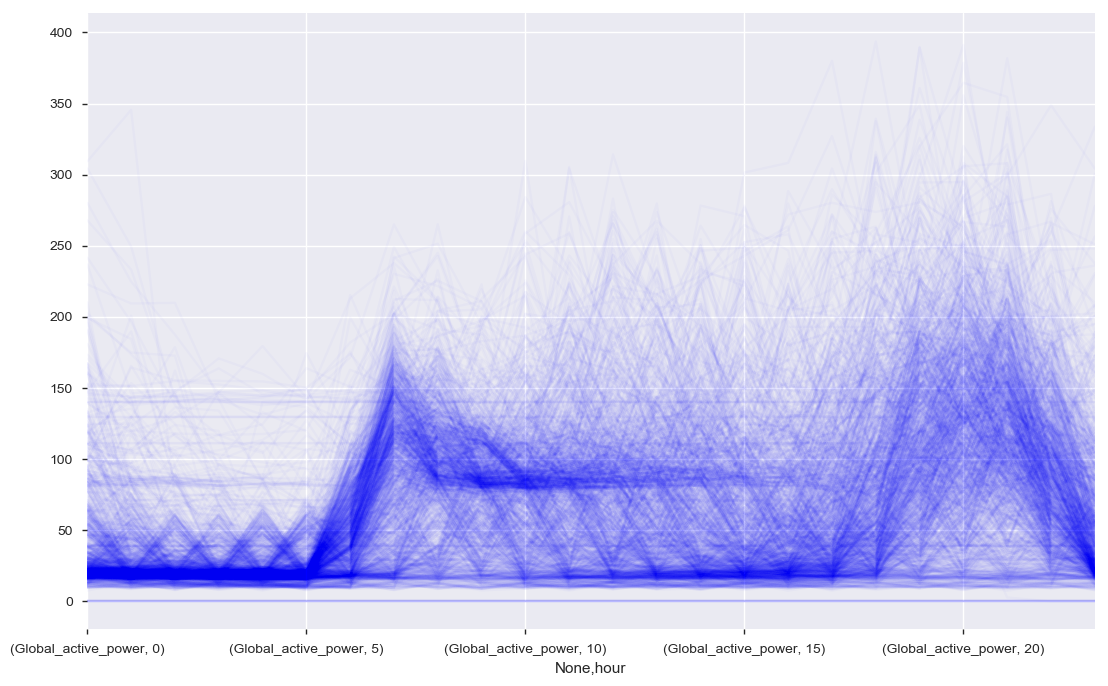

In [10]:
df_hourly_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

# K-Means has been fed with this data. Number of clusters has been chosen using sillhoute score. Experiment indicated that 2 or 3 clusters should be tested

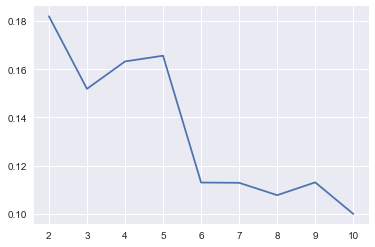

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,11).astype(int)

X = df_hourly_pivot.values.copy()

sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(n_cluster_list, sillhoute_scores)

In [6]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2

kmeans = KMeans(n_clusters)
df_hourly_pivot['Cluster_KMeans'] = kmeans.fit_predict(X)

ahc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
df_hourly_pivot['Cluster_AHC'] = ahc.fit_predict(X)

Text(0.5, 0, 'hour')

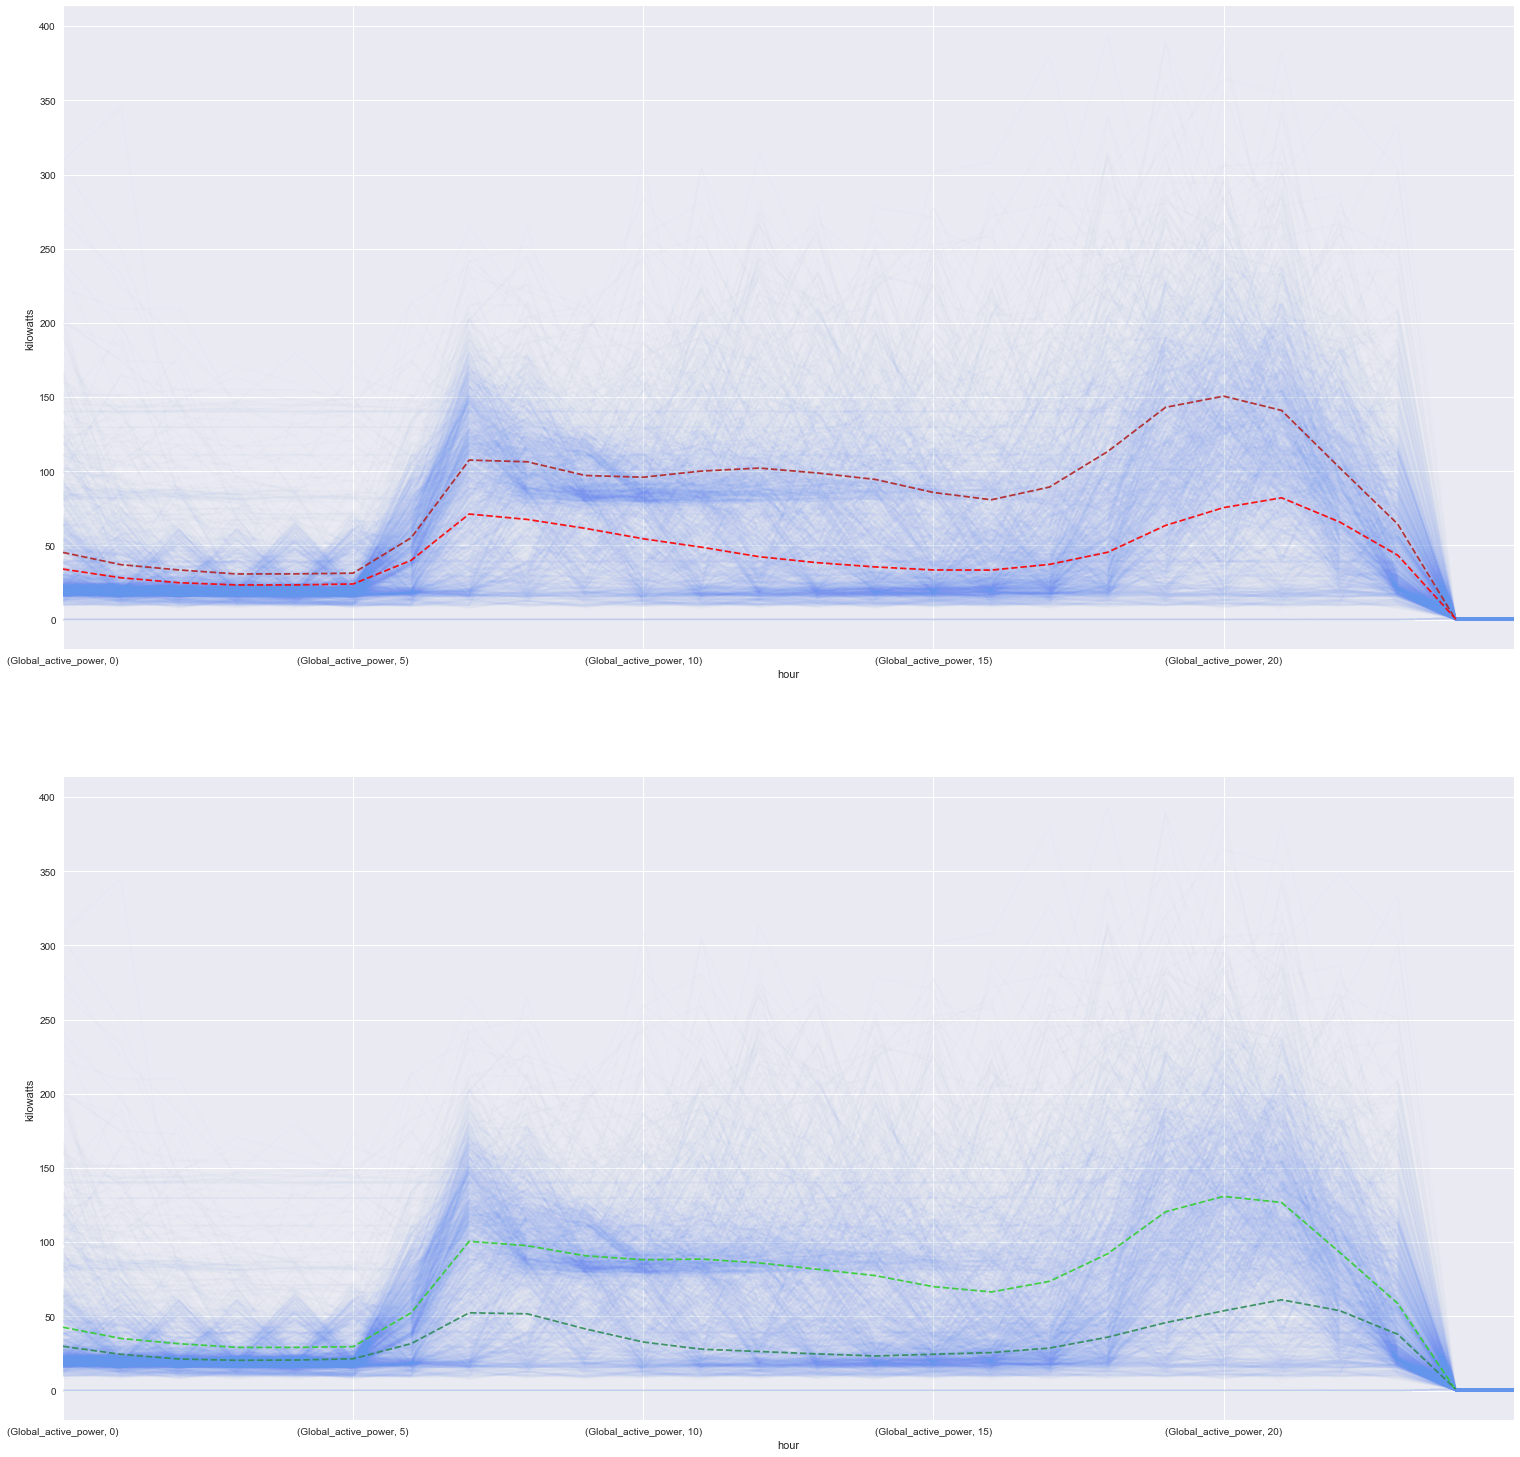

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(26,26))

color_list_kmeans = ['firebrick','red', 'coral', 'orange']
cluster_values_kmeans = df_hourly_pivot.groupby(['Cluster_KMeans']).mean()

color_list_ahc = ['limegreen','seagreen', 'greenyellow']
cluster_values_ahc = df_hourly_pivot.groupby(['Cluster_AHC']).mean()

df_hourly_pivot.T.plot(ax=axes[0], legend=False, color='cornflowerblue', alpha=0.02, use_index=False)
df_hourly_pivot.T.plot(ax=axes[1], legend=False, color='cornflowerblue', alpha=0.02, use_index=False)

for i, cluster in enumerate(range(n_clusters)):
    cluster_values_kmeans.T[i].plot(ax=axes[0], color=color_list_kmeans[i], legend=False, alpha=0.9, ls='--')
    cluster_values_ahc.T[i].plot(ax=axes[1], color=color_list_ahc[i], legend=False, alpha=0.9, ls='--')
    

axes[0].set_ylabel('kilowatts')
axes[0].set_xlabel('hour')

axes[1].set_ylabel('kilowatts')
axes[1].set_xlabel('hour')

# Results of clustering have been visualised

Text(0.5, 0, 'AHC')

<Figure size 432x288 with 0 Axes>

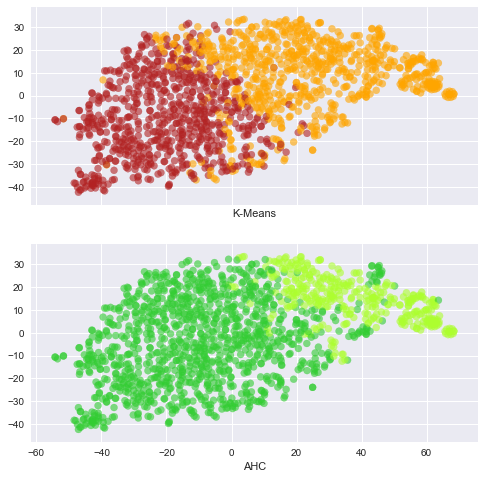

In [8]:
from sklearn.manifold import TSNE
import matplotlib.colors

f = plt.figure() 
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey = True)

tsne = TSNE()
results_tsne = tsne.fit_transform(df_hourly_pivot)

colors_map_kmeans = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values_kmeans, color_list_kmeans)
axes[0].scatter(results_tsne[:,0], results_tsne[:,1],
    c=df_hourly_pivot['Cluster_KMeans'],
    cmap=colors_map_kmeans, 
    alpha=0.6, 
    )
axes[0].set_xlabel('K-Means')

colors_map_ahc = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values_ahc, color_list_ahc)
axes[1].scatter(results_tsne[:,0], results_tsne[:,1],
    c=df_hourly_pivot['Cluster_AHC'],
    cmap=colors_map_ahc, 
    alpha=0.6, 
    )
axes[1].set_xlabel('AHC')

Davies Bouldin scores have been computed for both the algorithms

In [49]:
from sklearn.metrics import davies_bouldin_score

labels_kmeans = kmeans.labels_
labels_ahc = ahc.labels_
print(f'Davies Bouldin score for K-Means: {davies_bouldin_score(df_hourly_pivot, labels_kmeans)}')
print(f'Davies Bouldin score for AHC: {davies_bouldin_score(df_hourly_pivot, labels_ahc)}')

Wynik Davies Bouldin score dla K-Means: 1.7466610250817862
Wynik Davies Bouldin score dla AHC: 1.5541540336588593


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
